In [1]:
# Step 0 – suppress any library warnings (optional but keeps output clean)
import warnings
warnings.filterwarnings("ignore")

# Step 1 – core libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 2 – load the Titanic data set
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 3 – select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target   = "Survived"

# keep only chosen columns, drop missing rows, take a copy to avoid warnings
df = df[features + [target]].dropna().copy()

# Step 4 – encode 'Sex' (male = 1, female = 0) without warnings
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

# Step 5 – split X (features) and y (labels)
X = df[features]
y = df[target]

# Step 6 – normalize numerical features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Step 7 – train/test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ At this point the dataset is clean, scaled, and ready for any classifier
print("Training matrix shape:", X_train.shape)
print("Test matrix shape:", X_test.shape)




Training matrix shape: (571, 6)
Test matrix shape: (143, 6)


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Drop columns with too many missing values or irrelevant features
df = df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'])

# Drop rows with missing target or required features
df = df.dropna(subset=['age', 'embarked', 'fare'])

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.7902097902097902

 Confusion Matrix:
 [[70 15]
 [15 43]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        85
           1       0.74      0.74      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



K = 1, Accuracy = 0.7413
K = 2, Accuracy = 0.7622
K = 3, Accuracy = 0.7343
K = 4, Accuracy = 0.7832
K = 5, Accuracy = 0.7832
K = 6, Accuracy = 0.7902
K = 7, Accuracy = 0.7762
K = 8, Accuracy = 0.7762
K = 9, Accuracy = 0.7552
K = 10, Accuracy = 0.7622
K = 11, Accuracy = 0.7692
K = 12, Accuracy = 0.7692
K = 13, Accuracy = 0.7552
K = 14, Accuracy = 0.7413
K = 15, Accuracy = 0.7413
K = 16, Accuracy = 0.7483
K = 17, Accuracy = 0.7483
K = 18, Accuracy = 0.7622
K = 19, Accuracy = 0.7483
K = 20, Accuracy = 0.7413


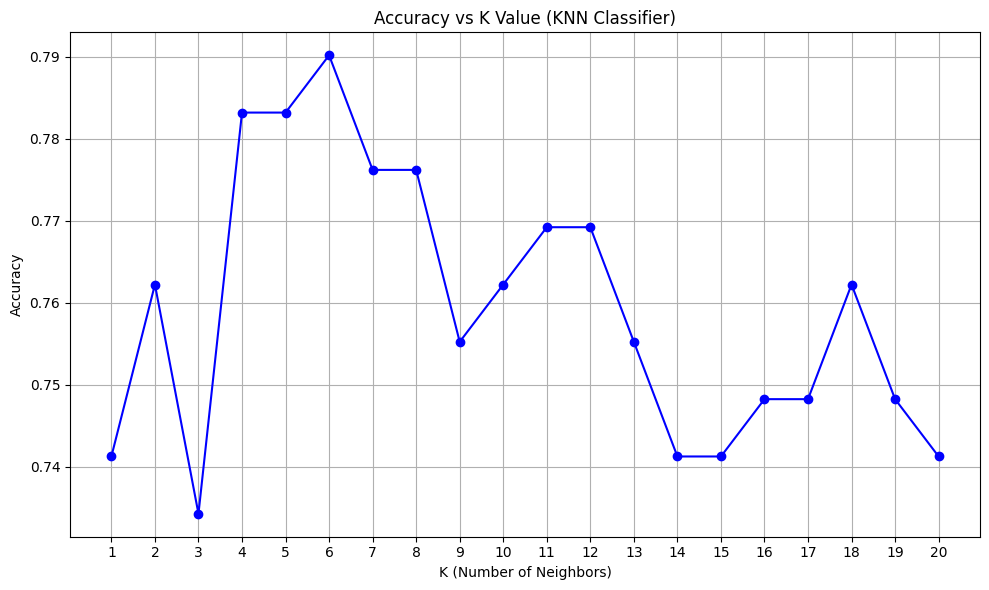

In [4]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Step 2: Load Titanic dataset
df = sns.load_dataset('titanic')

# Step 3: Select useful features & drop missing data
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()

# Convert categorical column to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Step 4: Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Experiment with different values of K
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")

# Step 8: Plot Accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs K Value (KNN Classifier)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# -----------------------------------------------
# Titanic KNN – accuracy & confusion-matrix demo
# -----------------------------------------------
import warnings
warnings.simplefilter("ignore")         # silence common pandas / sklearn warnings

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load dataset
df = sns.load_dataset("titanic")

# 2. Select useful columns (feel free to add/remove)
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "alone"]
target   = "survived"

# 3. Drop rows with missing values in used columns
df = df[features + [target]].dropna().reset_index(drop=True)

# 4. One-hot encode categorical variables
X = pd.get_dummies(df[features], drop_first=True)
y = df[target]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 6. Feature scaling (important for distance-based models like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 7. Train KNN (k = 5 but change to experiment)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. Evaluate
y_pred = knn.predict(X_test)
acc    = accuracy_score(y_test, y_pred)
cm     = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("\nConfusion matrix (rows: actual, columns: predicted):\n")
print(cm)

Accuracy: 0.7865

Confusion matrix (rows: actual, columns: predicted):

[[90 16]
 [22 50]]


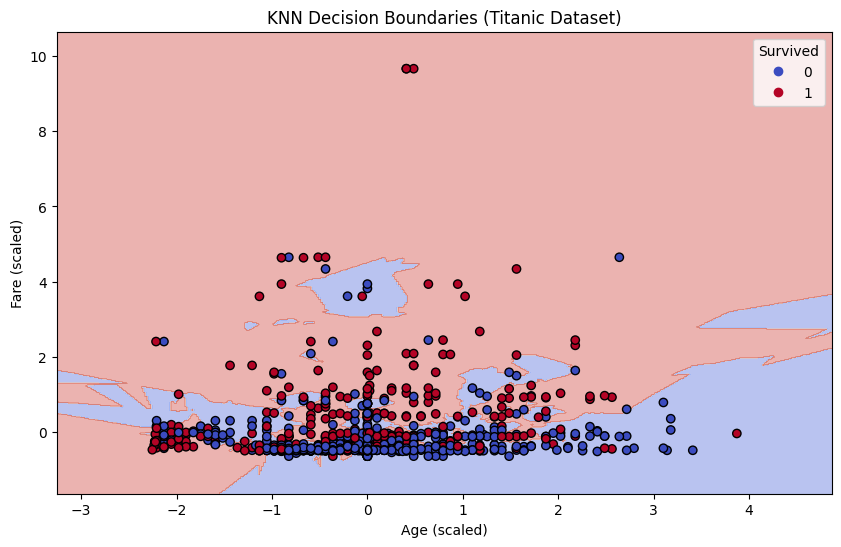

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select 2 numerical features for visualization
data = df[['age', 'fare', 'survived']].copy()

# Drop rows where target is missing
data = data.dropna(subset=['survived'])

# Impute missing values in 'age' and 'fare'
imputer = SimpleImputer(strategy='mean')
data[['age', 'fare']] = imputer.fit_transform(data[['age', 'fare']])

# Split features and target
X = data[['age', 'fare']]
y = data['survived']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_scaled, y)

# Decision boundary visualization
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Age (scaled)')
plt.ylabel('Fare (scaled)')
plt.title('KNN Decision Boundaries (Titanic Dataset)')
plt.legend(*scatter.legend_elements(), title="Survived")
plt.show()
